In [72]:
%pylab inline
import glob
import os
import pandas as pd

from riboraptor.helpers import path_leaf

from scipy import signal
def _shift_bit_length(x):
    """Shift bit"""
    return 1 << (x - 1).bit_length()


def _padwithzeros(vector, pad_width, iaxis, kwargs):
    """Pad with zeros"""
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

def coherence(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    next_pow2_length = _shift_bit_length(length)
    values = np.lib.pad(values,
                        (0, next_pow2_length - len(values) % next_pow2_length),
                        _padwithzeros)
    mean_centered_values = values - np.nanmean(values)
    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    uniform_signal = [0.7, 0.2, 0.1] * (next_pow2_length // 3)
    uniform_signal = np.lib.pad(
        uniform_signal,
        (0, next_pow2_length - len(uniform_signal) % next_pow2_length),
        _padwithzeros)

    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = uniform_signal / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(values, uniform_signal, nperseg=30, noverlap=27)
    return f, Cxy, values, uniform_signal 


def coherence2(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    uniform_signal = [0.7, 0.2, 0.1] * (length // 3)
    mean_centered_values = values - np.nanmean(values)
    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    
    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = mean_centered_values / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(normalized_values, uniform_signal, nperseg=30, noverlap=27)
    return f, Cxy, values, uniform_signal 

def coherence3(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    uniform_signal = [1, 0, 0] * (length // 3)
    mean_centered_values = values - np.nanmean(values)
    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    
    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = mean_centered_values / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(normalized_values, uniform_signal, nperseg=30, noverlap=27)
    periodicity_score = Cxy[np.argwhere(np.isclose(f, 1 / 3.0))[0]][0]
    return periodicity_score, f, Cxy, uniform_signal,normalized_values


def coherence4(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    uniform_signal = [1, 0, 0] * (length // 3)
    mean_centered_values = values - np.nanmean(values)
    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    
    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = mean_centered_values / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(normalized_values, uniform_signal, nperseg=30, noverlap=15)
    periodicity_score = Cxy[np.argwhere(np.isclose(f, 1 / 3.0))[0]][0]
    return periodicity_score, f, Cxy, uniform_signal,normalized_values

def coherence5(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    uniform_signal = [1, 0.5, 0.5] * (length // 3)
    #mean_centered_values = values - np.nanmean(values)
    #normalized_values = mean_centered_values / \
    #    np.max(np.abs(mean_centered_values))
    
    #mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    #uniform_signal = mean_centered_values / \
    #    np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(values, uniform_signal, nperseg=30, noverlap=15)
    periodicity_score = Cxy[np.argwhere(np.isclose(f, 1 / 3.0))[0]][0]
    return periodicity_score, f, Cxy, uniform_signal,values




re_ribo_analysis_dir = '/staging/as/skchoudh/re-ribo-analysis/'
assemblies = os.listdir(re_ribo_analysis_dir)

assembly = 'sacCerR64'



Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0.8847438889374772


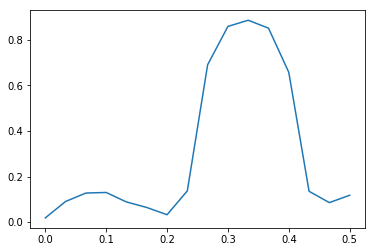

In [67]:
def coherence5(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    uniform_signal = [1, 0.5, 0.5] * (length // 3)
    #mean_centered_values = values - np.nanmean(values)
    #normalized_values = mean_centered_values / \
    #    np.max(np.abs(mean_centered_values))
    
    #mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    #uniform_signal = mean_centered_values / \
    #    np.max(np.abs(uniform_signal))
    # boxcar, triang, blackman, hamming, hann, bartlett, flattop, parzen, bohman, blackmanharris, nuttall, barthann
    f, Cxy = signal.coherence(values, uniform_signal, window='flattop', nperseg=30, noverlap=15)
    periodicity_score = Cxy[np.argwhere(np.isclose(f, 1 / 3.0))[0]][0]
    return periodicity_score, f, Cxy, uniform_signal,values

values = metagene_values['SRX2536423']
periodicity_score, f, Cxy, uniform_signal,normalized_values  = coherence5(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(periodicity_score)

0.8538028540068797


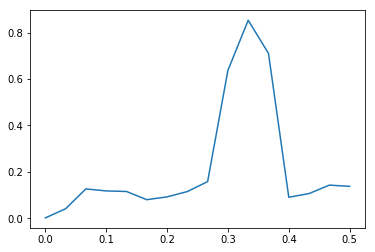

In [100]:
def coherence6(values):
    #values = pd.Series(values)
    #values = values[0:max(values.index)]
    length = len(values)
    values = pd.Series(values.tolist())
    uniform_signal = [1, 0, 0] * (length // 3)
    max_rolling = values.rolling(3).max().dropna()#.shift(-2)
    max_rolling = max_rolling.add(pd.Series(max_rolling[2], index=[0]), fill_value=0)
    max_rolling = max_rolling.add(pd.Series(max_rolling[2], index=[1]), fill_value=0)
    
    #max_rolling = max_rolling.append(pd.Series(max_rolling[len(max_rolling)-1]))
    #max_rolling.append(max_rolling[-1])
    #max_rolling[-1] = max_rolling[-3]
    #print(len(max_rolling))

    denominator_x = max_rolling[np.arange(0, len(max_rolling), 3)]
    denominator = []
    for x in denominator_x.tolist():
        denominator.append(x)
        denominator.append(x)
        denominator.append(x)
        
    denominator = pd.Series(denominator)[0:len(max_rolling)]
    #print(len(max_rolling))

    #print(len(denominator))
    #print(len(values))
    #print(denominator)
    #print(values)
    values = values.divide(denominator)
    #print(max_rolling)
    #print(denominator)
    mean_centered_values = values - np.nanmean(values)

    normalized_values = mean_centered_values / \
        np.max(np.abs(mean_centered_values))
    
    mean_centered_values = uniform_signal - np.nanmean(uniform_signal)
    uniform_signal = mean_centered_values / \
        np.max(np.abs(uniform_signal))
    f, Cxy = signal.coherence(normalized_values, uniform_signal, nperseg=30, noverlap=15)
    periodicity_score = Cxy[np.argwhere(np.isclose(f, 1 / 3.0))[0]][0]
    return periodicity_score, f, Cxy, uniform_signal,normalized_values

values = metagene_values['SRX2536423']
periodicity_score, f, Cxy, uniform_signal,normalized_values  = coherence6(values[np.arange(-30, 120)])
plt.plot(f, Cxy)
print(periodicity_score)

In [ ]:
 1825779 2457032 3493449 4219437 5735329 6831460 7263794 8733279 9571544 0901567

In [47]:
assembly = 'hg38'
metagene_values = {}

directory = os.path.join(re_ribo_analysis_dir, assembly)
for srp in os.listdir(directory):
    print(srp)
    metagene_dir = os.path.join(directory, srp, 'metagene_coverages')
    for f in glob.glob('{}/*.tsv'.format(metagene_dir)):
        df = pd.read_table(f)
        values = pd.Series(df['count'].tolist(), index=df['position'].tolist())
        metagene_values[path_leaf(f).split('.')[0]] = values

    



SRP098789
SRP049168
SRP017942
SRP038695
SRP045214
SRP042937
SRP092068
SRP055009
SRP109126
SRP010679_fixed_adapters


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/signal/spectral.py:1382: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


0.8427300315996367


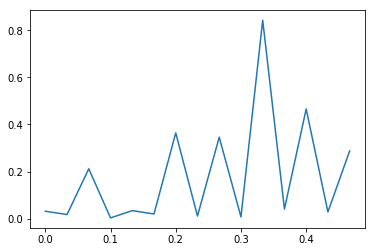

In [25]:
assembly = 'sacCerR64'
metagene_values = {}

directory = os.path.join(re_ribo_analysis_dir, assembly)
for srp in os.listdir(directory):
    print(srp)
    metagene_dir = os.path.join(directory, srp, 'metagene_coverages')
    for f in glob.glob('{}/*.tsv'.format(metagene_dir)):
        df = pd.read_table(f)
        values = pd.Series(df['count'].tolist(), index=df['position'].tolist())
        metagene_values[path_leaf(f).split('.')[0]] = values

    



SRP043036
SRP055707
SRP056647
SRP043036_fixed_adapters


In [27]:
assembly = 'BDGP6'
metagene_values = {}

directory = os.path.join(re_ribo_analysis_dir, assembly)
for srp in os.listdir(directory):
    print(srp)
    metagene_dir = os.path.join(directory, srp, 'metagene_coverages')
    for f in glob.glob('{}/*.tsv'.format(metagene_dir)):
        df = pd.read_table(f)
        values = pd.Series(df['count'].tolist(), index=df['position'].tolist())
        metagene_values[path_leaf(f).split('.')[0]] = values

metagene_values.keys()



SRP045475
SRP108999
SRP033366
SRP028243
SRP028243_fixed_adapters


dict_keys(['SRX384561', 'SRX327694', 'SRX2902869', 'SRX384547', 'SRX2902861', 'SRX327692', 'SRX2902857', 'SRX384531', 'SRX2902865', 'SRX2902866', 'SRX327688', 'SRX2902872', 'SRX384530', 'SRX384554', 'SRX2902868', 'SRX384570', 'SRX679370', 'SRX384577', 'SRX384564', 'SRX2902862', 'SRX2902860', 'SRX384574', 'SRX327690', 'SRX384559', 'SRX384552', 'SRX384569', 'SRX2902864', 'SRX2902856', 'SRX384575', 'SRX384544', 'SRX384556', 'SRX384572', 'SRX384558', 'SRX384535', 'SRX384537', 'SRX384580', 'SRX384563', 'SRX384566', 'SRX679369', 'SRX384542', 'SRX679368', 'SRX384532', 'SRX384573', 'SRX327697', 'SRX384545', 'SRX327695', 'SRX679371', 'SRX327693', 'SRX2902854', 'SRX384541', 'SRX384528', 'SRX2902863', 'SRX384536', 'SRX384548', 'SRX2902852', 'SRX384543', 'SRX384555', 'SRX2902871', 'SRX384539', 'SRX384562', 'SRX2902870', 'SRX327696', 'SRX327691', 'SRX384567', 'SRX384533', 'SRX384557', 'SRX384540', 'SRX2902855', 'SRX384546', 'SRX384538', 'SRX384579', 'SRX2902858', 'SRX2902859', 'SRX2902853', 'SRX384

0.6457233166107408


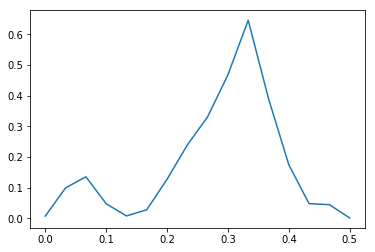

In [44]:
values = metagene_values['SRX679371']
periodicity_score, f, Cxy, uniform_signal,normalized_values  = coherence5(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(periodicity_score)

0.6457233166107409


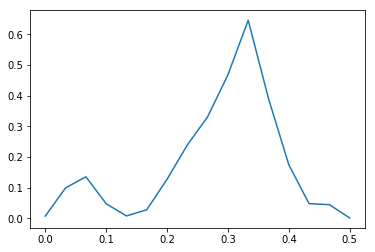

In [31]:
values = metagene_values['SRX679371']
f, Cxy, values, uniform_signal  = coherence4(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

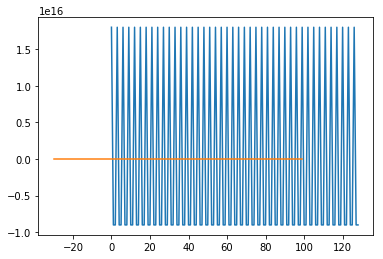

In [33]:
plt.plot(uniform_signal/uniform_signal.mean())
plt.plot(values/values.mean())



In [38]:
uniform_signal

array([ 0.66666667, -0.33333333, -0.33333333,  0.66666667, -0.33333333,
       -0.33333333,  0.66666667, -0.33333333, -0.33333333,  0.66666667,
       -0.33333333, -0.33333333,  0.66666667, -0.33333333, -0.33333333,
        0.66666667, -0.33333333, -0.33333333,  0.66666667, -0.33333333,
       -0.33333333,  0.66666667, -0.33333333, -0.33333333,  0.66666667,
       -0.33333333, -0.33333333,  0.66666667, -0.33333333, -0.33333333,
        0.66666667, -0.33333333, -0.33333333,  0.66666667, -0.33333333,
       -0.33333333,  0.66666667, -0.33333333, -0.33333333,  0.66666667,
       -0.33333333, -0.33333333,  0.66666667, -0.33333333, -0.33333333,
        0.66666667, -0.33333333, -0.33333333,  0.66666667, -0.33333333,
       -0.33333333,  0.66666667, -0.33333333, -0.33333333,  0.66666667,
       -0.33333333, -0.33333333,  0.66666667, -0.33333333, -0.33333333,
        0.66666667, -0.33333333, -0.33333333,  0.66666667, -0.33333333,
       -0.33333333,  0.66666667, -0.33333333, -0.33333333,  0.66

In [36]:
values/values.mean()

-30    0.729539
-29    0.522304
-28    0.398806
-27    0.888542
-26    0.621755
-25    0.651078
-24    0.695001
-23    0.734109
-22    0.664349
-21    0.816027
-20    0.863397
-19    0.796283
-18    0.880063
-17    0.958221
-16    1.165191
-15    1.342159
-14    0.830597
-13    0.771722
-12    1.629076
-11    1.240505
-10    0.839491
-9     1.290660
-8     1.082215
-7     1.043654
-6     0.826694
-5     1.143537
-4     0.666634
-3     1.465246
-2     0.935238
-1     0.984347
         ...   
 70    1.359722
 71    0.562459
 72    1.221925
 73    0.857787
 74    0.518316
 75    0.852343
 76    0.820178
 77    0.599635
 78    1.436659
 79    1.526017
 80    0.717902
 81    0.825274
 82    0.911799
 83    1.032395
 84    1.149985
 85    1.620271
 86    1.033213
 87    1.061287
 88    1.277888
 89    1.046092
 90    1.367921
 91    1.220024
 92    1.053687
 93    1.294270
 94    1.053649
 95    0.669312
 96    0.801442
 97    1.369117
 98    0.825847
 99    0.979406
Length: 130, dtype: floa

In [101]:
values = metagene_values['SRX581790']
f, Cxy, values, uniform_signal  = coherence4(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

KeyError: 'SRX581790'

0.19875013523518675


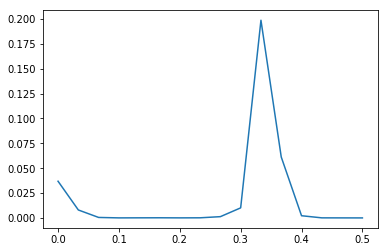

In [12]:
values = metagene_values['SRX2536425']
f, Cxy, values, uniform_signal  = coherence3(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

0.3063346907368657


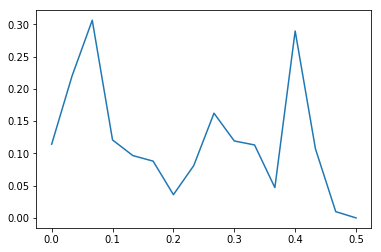

In [13]:
values = metagene_values['SRX2536425']
f, Cxy, values, uniform_signal  = coherence4(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

0.9491971070175226


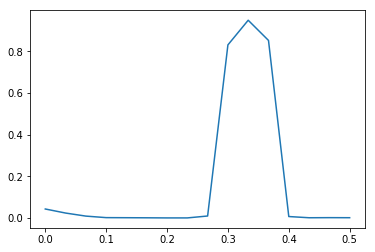

In [14]:
values = metagene_values['SRX2536424']
f, Cxy, values, uniform_signal  = coherence3(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

0.9540272036161885


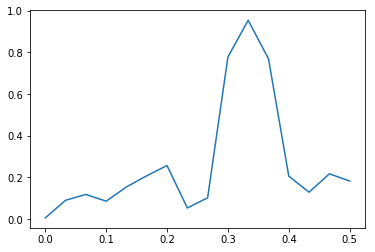

In [15]:
values = metagene_values['SRX2536424']
f, Cxy, values, uniform_signal  = coherence4(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
values = metagene_values['SRX474109']
f, Cxy, values, uniform_signal  = coherence3(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
values = metagene_values['SRX581792']
plt.plot(np.roll(ualues)

In [ ]:
values = metagene_values['SRX118292']
f, Cxy, values, uniform_signal  = coherence(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
values = metagene_values['SRX118291']
f, Cxy, values2, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
values = metagene_values['SRX894014']
f, Cxy, values2, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
plt.plot(values)

In [ ]:
values = metagene_values['SRX118289']
f, Cxy, values, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
values = metagene_values['SRX118285']
f, Cxy, values, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
values = metagene_values['SRX894025']
f, Cxy, values, uniform_signal  = coherence2(values[np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
np.argwhere(f==0.33333333)

In [ ]:
Cxy[np.argwhere(np.isclose(f, 0.33333333))[0]]

In [ ]:
Cxy[np.where(f==0.33333333)]

In [ ]:
f, Cxy, values, uniform_signal  = coherence(metagene_values['SRX021972'][np.arange(-30, 100)])
plt.plot(f, Cxy)
print(np.max(Cxy))

In [ ]:
plt.plot(f)

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))
ax.plot(values)
ax.plot(uniform_signal)


In [ ]:
plt.plot(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')


In [ ]:
values = metagene_values['SRX021972'][np.arange(-30,100)]
plt.plot(values.index, values.values)

In [ ]:
1598692 2227797 3414565 4245586 5446123 6834077 7124692 8144675 9180651 0666347

In [ ]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)